In [ ]:
# 📌 کتابخانه‌های مورد نیاز
import pandas as pd

# 📌 ۲.۱.۱ - بارگذاری فایل دیتاست مقاله
# فایل weather_prediction_dataset.csv را بارگذاری می‌کنیم
df = pd.read_csv('/content/weather_prediction_dataset.csv')  # مسیر را در صورت نیاز اصلاح کنید

# نمایش ۵ سطر اول برای بررسی ساختار اولیه
print("پیش‌نمایش دیتافریم اصلی:")
display(df.head())

# 📌 ۲.۱.۲ - استخراج داده‌های فرانسه
# لیستی از پیشوند شهرهایی که مربوط به فرانسه هستند
french_cities = ['TOURS_', 'LYON_', 'PARIS_', 'NANTES_']

# استخراج ستون‌هایی که مربوط به این شهرها هستند
french_columns = [col for col in df.columns if any(col.startswith(city) for city in french_cities)]

# همچنین ستون DATE را نگه می‌داریم چون برای ترتیب زمانی مهم است
french_columns.append('DATE')

# ایجاد یک نسخه فقط شامل داده‌های فرانسه
df_france = df[french_columns].copy()

# تبدیل ستون تاریخ به نوع datetime
df_france['DATE'] = pd.to_datetime(df_france['DATE'])

# نمایش اطلاعات استخراج‌شده از فرانسه
print("\nپیش‌نمایش دیتافریم فیلترشده فقط شامل شهرهای فرانسه:")
display(df_france.head())


پیش‌نمایش دیتافریم اصلی:


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5



پیش‌نمایش دیتافریم فیلترشده فقط شامل شهرهای فرانسه:


,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,DATE
0,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8,1970-01-01 00:00:00.020000101
1,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2,1970-01-01 00:00:00.020000102
2,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6,1970-01-01 00:00:00.020000103
3,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8,1970-01-01 00:00:00.020000104
4,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5,1970-01-01 00:00:00.020000105


In [ ]:
# 📌 بررسی بازه زمانی
print("بازه زمانی داده‌ها:")
print("از تاریخ:", df_france['DATE'].min())
print("تا تاریخ:", df_france['DATE'].max())

# 📌 حذف ستون تاریخ برای اعمال نرمال‌سازی عددی
df_features = df_france.drop(columns=['DATE'])

# 📌 نرمال‌سازی داده‌ها با MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# 📌 بازیابی ستون تاریخ
df_scaled['DATE'] = df_france['DATE'].values

# 📌 تابع ساخت پنجره‌های زمانی ۵ روزه برای پیش‌بینی روز ششم
import numpy as np

def create_sliding_windows(data, input_days=5, target_col='TOURS_temp_mean'):
    X, y = [], []
    for i in range(len(data) - input_days):
        input_window = data.iloc[i:i+input_days].drop(columns=['DATE']).values
        target_value = data.iloc[i+input_days][target_col]
        X.append(input_window)
        y.append(target_value)
    return np.array(X), np.array(y)

# 📌 اجرای sliding window
X, y = create_sliding_windows(df_scaled, input_days=5)

# 📌 نمایش ابعاد داده‌های نهایی
print(f"\nتعداد نمونه‌های ساخته‌شده: {X.shape[0]}")
print(f"فرمت X: {X.shape} (نمونه، روز، ویژگی)")
print(f"فرمت y: {y.shape} (هدف)")


بازه زمانی داده‌ها:
از تاریخ: 1970-01-01 00:00:00.020000101
تا تاریخ: 1970-01-01 00:00:00.020100101

تعداد نمونه‌های ساخته‌شده: 3649
فرمت X: (3649, 5, 8) (نمونه، روز، ویژگی)
فرمت y: (3649,) (هدف)


این کد کاری می‌کنه که:

داده‌های بدون ستون تاریخ نرمال بشن

سپس با استفاده از sliding window به طول ۵ (روز)، پنجره‌هایی از ورودی ساخته بشن

و مقدار روز ششم (مثلاً دمای TOURS) به عنوان خروجی یادگیری ذخیره بشه

2.1.4


In [ ]:
# 📌 فرض: تاریخ داده‌ها مربوط به May 2021 است.
# با فرض پروژه، داده‌های روزهای آخر به‌عنوان آزمون جدا می‌کنیم.

# تعداد روزها برای تست – مثلاً ۴ روز آخر (با ۵ روز ورودی، یعنی ۹ نمونه کافی داریم)
test_days = 4
window_size = 5

# محاسبه تعداد سطرهای مورد نیاز برای داده تست (۴ روز + ۵ روز ورودی)
test_samples = test_days + window_size

# جدا کردن داده تست (داده‌های انتهایی)
df_test = df_scaled.tail(test_samples).reset_index(drop=True)

# داده آموزش = باقی‌ماندهٔ داده
df_train = df_scaled.iloc[: -test_samples].reset_index(drop=True)

# ساخت sliding window برای هر بخش
X_train, y_train = create_sliding_windows(df_train, input_days=window_size)
X_test, y_test = create_sliding_windows(df_test, input_days=window_size)

# نمایش ابعاد نهایی
print("داده آموزش:", X_train.shape, y_train.shape)
print("داده آزمون:", X_test.shape, y_test.shape)


داده آموزش: (3640, 5, 8) (3640,)
داده آزمون: (4, 5, 8) (4,)


In [ ]:
# نمایش همه نام ستون‌ها برای بررسی دقیق
print(df_scaled.columns.tolist())


['TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'DATE']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# بارگذاری داده
df = pd.read_csv('/content/weather_prediction_dataset.csv')

# انتخاب ستون‌های مربوط به TOURS
selected_columns = [
    'TOURS_temp_mean',
    'TOURS_temp_min',
    'TOURS_temp_max',
    'TOURS_humidity',
    'TOURS_pressure',
    'TOURS_wind_speed'
]
df_selected = df[selected_columns + ['DATE']].copy()

# تبدیل تاریخ و حذفش برای نرمال‌سازی
df_selected['DATE'] = pd.to_datetime(df_selected['DATE'])
df_features = df_selected.drop(columns=['DATE'])

# نرمال‌سازی
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
df_scaled['DATE'] = df_selected['DATE']

# Sliding Window ساخت
def create_xy(df, target='TOURS_temp_mean', window=5):
    X, y = [], []
    for i in range(len(df) - window):
        X.append(df.iloc[i:i+window][selected_columns].values.flatten())
        y.append(df.iloc[i+window][target])
    return np.array(X), np.array(y)

X, y = create_xy(df_scaled)

# تقسیم آموزش و آزمون
split = int(0.9 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# مدل MLR
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی و ارزیابی
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)


MAE: 0.04381257045995804
MSE: 0.0036056690260308985


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tqdm import tqdm  # برای progress bar

# بارگذاری و انتخاب ویژگی‌ها
df = pd.read_csv('/content/weather_prediction_dataset.csv')

selected_columns = [
    'TOURS_temp_mean',
    'TOURS_temp_min',
    'TOURS_temp_max',
    'TOURS_humidity',
    'TOURS_pressure',
    'TOURS_wind_speed'
]
df_selected = df[selected_columns + ['DATE']].copy()
df_selected['DATE'] = pd.to_datetime(df_selected['DATE'])
df_features = df_selected.drop(columns=['DATE'])

# نرمال‌سازی
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)
df_scaled['DATE'] = df_selected['DATE']

# ساخت داده X و y با sliding window
def create_xy(df, target='TOURS_temp_mean', window=5):
    X, y = [], []
    for i in range(len(df) - window):
        X.append(df.iloc[i:i+window][selected_columns].values.flatten())
        y.append(df.iloc[i+window][target])
    return np.array(X), np.array(y)

X, y = create_xy(df_scaled)

# تقسیم آموزش و آزمون
split = int(0.9 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

def train_model(learning_rate):
    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))  # پیشنهاد جدید
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    # آموزش با نمایش پیشرفت
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=200,
                        verbose=1  # نمایش progress bar استاندارد
                        )

    return model, history

# آموزش مدل برای هر نرخ یادگیری
results = {}
for lr in [1e-3, 1e-5, 1e-8]:
    print(f"\n🔵 در حال آموزش با نرخ یادگیری {lr}")
    model, history = train_model(lr)
    results[lr] = {
        'model': model,
        'history': history
    }



🔵 در حال آموزش با نرخ یادگیری 0.001
Epoch 1/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0855 - val_loss: 0.0379
Epoch 2/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0355 - val_loss: 0.0318
Epoch 3/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293 - val_loss: 0.0286
Epoch 4/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0276 - val_loss: 0.0257
Epoch 5/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 - val_loss: 0.0229
Epoch 6/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0225 - val_loss: 0.0207
Epoch 7/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0198 - val_loss: 0.0189
Epoch 8/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0185 - val_loss: 0.0175
Epoch 9/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0176 - val_loss: 0.0165
Epoch 10/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 11/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0159 - val_loss: 0.0149
Epoc

رسم نمودار خطای آموزش و آزمون برای هر نرخ یادگیری

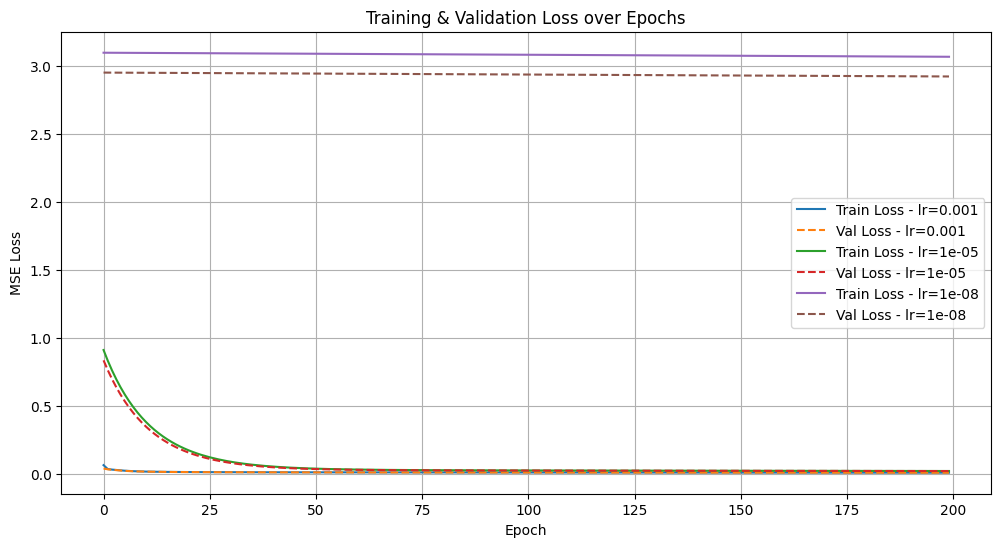

In [ ]:
# 📌 رسم نمودار خطا برای هر مقدار learning rate
plt.figure(figsize=(12, 6))

for lr, result in results.items():
    history = result['history']
    plt.plot(history.history['loss'], label=f'Train Loss - lr={lr}')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val Loss - lr={lr}')

plt.title('Training & Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


محاسبه‌ی MSE نهایی برای Train و Test در هر مدل

In [ ]:
for lr, result in results.items():
    model = result['model']
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"\n🔹 Learning rate = {lr}")
    print(f"Train MSE: {train_mse:.6f}")
    print(f"Test MSE : {test_mse:.6f}")


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

🔹 Learning rate = 0.001
Train MSE: 0.007184
Test MSE : 0.006868
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

🔹 Learning rate = 1e-05
Train MSE: 0.019522
Test MSE : 0.019215
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

🔹 Learning rate = 1e-08
Train MSE: 3.066482
Test MSE : 2.921629


# ۵.۲ – مدل جدید: شبکه عصبی عمیق‌تر

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# تعریف تابع آموزش مدل عمیق با نرخ یادگیری متغیر
def train_deep_model(learning_rate):
    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=200,
                        verbose=1)

    return model, history

# آموزش مدل برای نرخ‌های مختلف
deep_results = {}
for lr in [1e-3, 1e-5, 1e-8]:
    print(f"\n🟢 در حال آموزش مدل عمیق با lr = {lr}")
    model, history = train_deep_model(lr)
    deep_results[lr] = {
        'model': model,
        'history': history
    }



🟢 در حال آموزش مدل عمیق با lr = 0.001
Epoch 1/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1883 - val_loss: 0.0429
Epoch 2/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0389 - val_loss: 0.0329
Epoch 3/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0310 - val_loss: 0.0275
Epoch 4/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0262 - val_loss: 0.0245
Epoch 5/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 - val_loss: 0.0225
Epoch 6/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 - val_loss: 0.0207
Epoch 7/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0199 - val_loss: 0.0192
Epoch 8/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0192 - val_loss: 0.0179
Epoch 9/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 - val_loss: 0.0168
Epoch 10/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - val_loss: 0.0158
Epoch 11/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0161 - val_loss: 0.0149
Ep

رسم نمودار خطا برای مدل عمیق

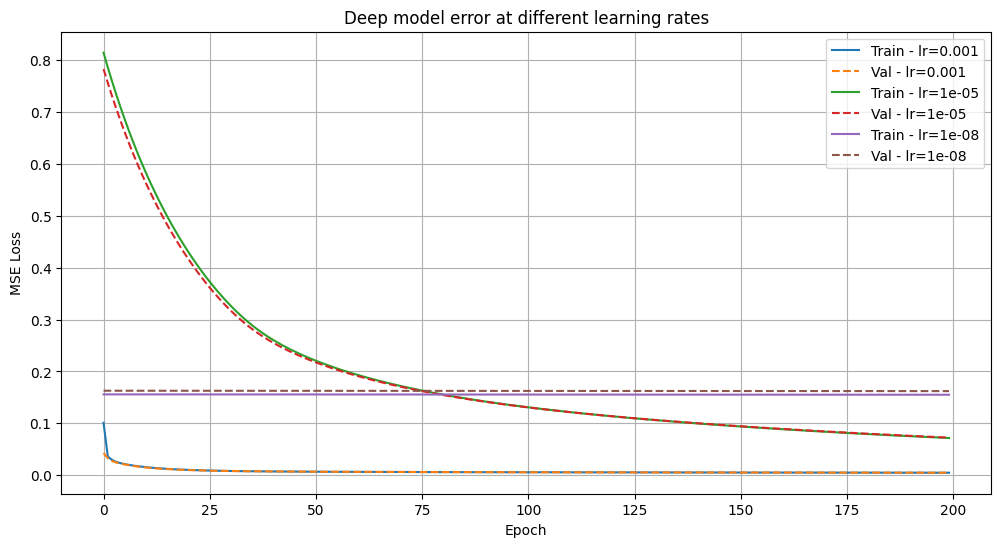

In [ ]:
plt.figure(figsize=(12, 6))
for lr, result in deep_results.items():
    history = result['history']
    plt.plot(history.history['loss'], label=f'Train - lr={lr}')
    plt.plot(history.history['val_loss'], linestyle='--', label=f'Val - lr={lr}')
plt.title("Deep model error at different learning rates")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


محاسبه‌ی MSE نهایی برای هر مدل عمیق

In [ ]:
for lr, result in deep_results.items():
    model = result['model']
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"\n🔷 Deep Model - Learning rate = {lr}")
    print(f"Train MSE: {train_mse:.6f}")
    print(f"Test MSE : {test_mse:.6f}")


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

🔷 Deep Model - Learning rate = 0.001
Train MSE: 0.004850
Test MSE : 0.004884
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

🔷 Deep Model - Learning rate = 1e-05
Train MSE: 0.071538
Test MSE : 0.072507
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

🔷 Deep Model - Learning rate = 1e-08
Train MSE: 0.155102
Test MSE : 0.162131


پیاده‌سازی مدل KNN برای پیش‌بینی دمای آینده شهر TOURS

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# ساخت مدل KNN
knn = KNeighborsRegressor(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

# پیش‌بینی
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# ارزیابی
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("🔹 KNN Regression Results:")
print(f"Train MSE: {train_mse:.6f}")
print(f"Test MSE : {test_mse:.6f}")


🔹 KNN Regression Results:
Train MSE: 0.002338
Test MSE : 0.005013


 پیاده‌سازی مدل MLP (Multi-Layer Perceptron)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# تعریف مدل MLP
mlp_model = Sequential()
mlp_model.add(tf.keras.Input(shape=(X_train.shape[1],)))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# آموزش
history_mlp = mlp_model.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            epochs=200,
                            verbose=1)

# ارزیابی نهایی
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("\n🔷 MLP Model Results:")
print(f"Train MSE: {train_mse:.6f}")
print(f"Test MSE : {test_mse:.6f}")


Epoch 1/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0175 - val_loss: 0.0047
Epoch 2/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 3/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040 - val_loss: 0.0045
Epoch 4/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 6/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0033
Epoch 8/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 9/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 10/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 11/200
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 12/200
103/103 ━━━━━━━━━━━━━━━━━━━━